Accuracy: 1.00


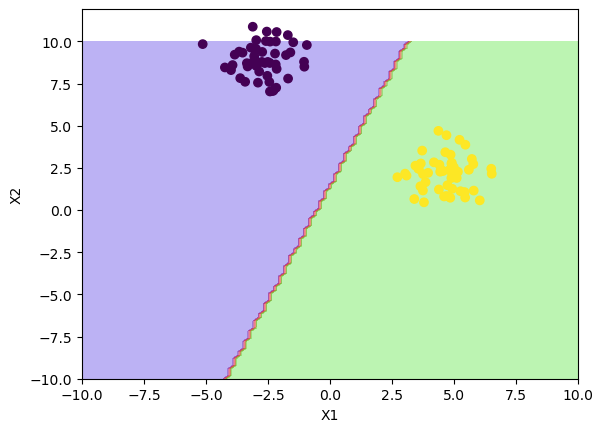

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generate data points
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# initialize weights and bias
np.random.seed(42)
w = np.random.rand(2)
b = np.random.rand()

# perceptron function
def perceptron(X, w, b):
    z = np.dot(X, w) + b
    y_pred = np.where(z > 0, 1, 0)
    return y_pred

# training function
def train_perceptron(X, y, w, b, alpha=0.1, n_epochs=10):
    for epoch in range(n_epochs):
        for xi, yi in zip(X, y):
            y_pred = perceptron(xi, w, b)
            w += alpha * (yi - y_pred) * xi
            b += alpha * (yi - y_pred)
    return w, b

# train the perceptron
w_new, b_new = train_perceptron(X, y, w, b, alpha=0.1, n_epochs=10)

# make predictions with new weights and bias
y_pred_new = perceptron(X, w_new, b_new)

# calculate accuracy with new weights and bias
accuracy_new = np.mean(y_pred_new == y)
print(f'Accuracy: {accuracy_new:.2f}')

# plot decision regions
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]
y_grid = perceptron(X_grid, w_new, b_new)
decision_regions = y_grid.reshape(xx.shape)
plt.contourf(xx, yy, decision_regions, alpha=0.3, cmap=plt.cm.brg)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
